<a href="https://colab.research.google.com/github/CrisMcode111/DI_Bootcamp/blob/main/w4_d3_breast_cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Daily Challenge: Breast Cancer Prediction
What you will create
In this notebook, you will be using 4 classification models- Logistic Regression, K Nearest Neighbours, Random Forests and Support Vector Machines (SVM).
dataset available here



Your Task
Exploratory Data Analysis
* Use pandas to load the dataset and examine the first few rows.
* Check and handle the missing values.
* Drop any unnecessary column
* Create a Countplot to display diagnosis from magma

Data Preprocessing, Building Models and Evaluation :
* counts of unique rows in the ‘diagnosis’ column
* map categorical values to numerical values
* Splitting the data into train and test
* Implement logistic regression and print the accuracy.
* Implement K Nearest Neighbours and print the accuracy.
* Implement Random Forests and print the accuracy.
* Implement Support Vector Machines (SVM) and print the accuracy.
* Which is the best model ?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [8]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")

print("Path to dataset files:", path)



Using Colab cache for faster access to the 'breast-cancer-wisconsin-data' dataset.
Path to dataset files: /kaggle/input/breast-cancer-wisconsin-data


In [10]:
import pandas as pd

# încarcă fișierul csv
df = pd.read_csv(path + "/data.csv")

# vezi primele 5 rânduri
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

/tmp/ipython-input-647121595.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="diagnosis", data=df, palette="magma")


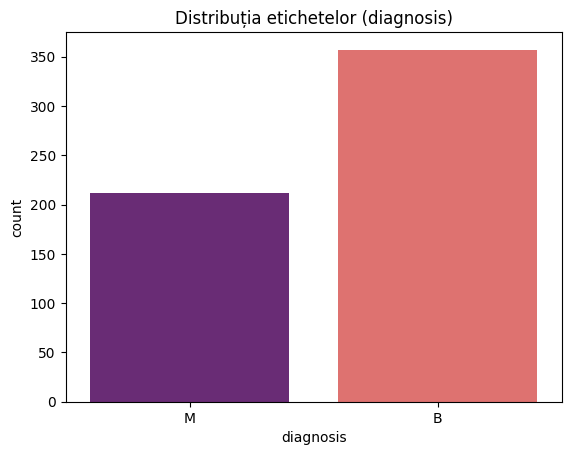

diagnosis
B    357
M    212
Name: count, dtype: int64


In [13]:
# info and missing values
print(df.info())
print(df.isnull().sum())

# drop non usefull columns if exist
for col in ["id", "Unnamed: 32"]:
    if col in df.columns:
        df.drop(columns=[col], inplace=True)

# countplot for 'diagnosis' with 'magma'
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="diagnosis", data=df, palette="magma")
plt.title("Distribuția etichetelor (diagnosis)")
plt.show()

# count labels
print(df["diagnosis"].value_counts())


In [17]:
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})

#separate features and target
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

#split train/test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#standardisation
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [19]:
y.isnull().sum()


np.int64(569)

In [20]:
df[df['diagnosis'].isnull()]


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,NaN,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,NaN,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,NaN,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,NaN,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,NaN,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,NaN,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,NaN,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,NaN,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,NaN,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [21]:
df = df.dropna(subset=['diagnosis'])


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1) Reload from source to start clean
df = pd.read_csv(path + "/data.csv")

# 2) Drop useless columns FIRST (the all-NaN one + id)
df = df.drop(columns=["id", "Unnamed: 32"], errors="ignore")

# 3) Only now deal with missing values on rows (if any)
# (This dataset shouldn't have others, but this keeps it safe)
df = df.dropna(axis=0, how="any")

# 4) Make sure 'diagnosis' is clean and map to 0/1
df["diagnosis"] = df["diagnosis"].astype(str).str.strip()
df = df[df["diagnosis"].isin(["M", "B"])]
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

# 5) Sanity checks before splitting
print("Shape:", df.shape)
print("Missing total:", int(df.isnull().sum().sum()))
print("Diagnosis counts:\n", df["diagnosis"].value_counts())

# 6) Split
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 7) Scale features (not the target!)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Shape: (569, 31)
Missing total: 0
Diagnosis counts:
 diagnosis
0    357
1    212
Name: count, dtype: int64


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

acc_log = accuracy_score(y_test, y_pred_log)
print("Accuracy Logistic Regression:", acc_log)


Accuracy Logistic Regression: 0.9649122807017544


In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy KNN:", acc_knn)


Accuracy KNN: 0.956140350877193


In [26]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy Random Forest:", acc_rf)


Accuracy Random Forest: 0.9736842105263158


In [27]:
from sklearn.svm import SVC

svm = SVC(kernel="linear")
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

acc_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy SVM:", acc_svm)


Accuracy SVM: 0.9649122807017544


In [29]:
results = {
    "Logistic Regression": acc_log,
    "KNN": acc_knn,
    "Random Forest": acc_rf,
    "SVM": acc_svm
}

for model, acc in results.items():
    print(f"{model}: {acc:.4f}")

best_model = max(results, key=results.get)
print("\nThe best model is:", best_model, "with accuracy:", results[best_model])


Logistic Regression: 0.9649
KNN: 0.9561
Random Forest: 0.9737
SVM: 0.9649

The best model is: Random Forest with accuracy: 0.9736842105263158


Logistic Regression: 0.9649
KNN: 0.9561
Random Forest: 0.9737
SVM: 0.9649


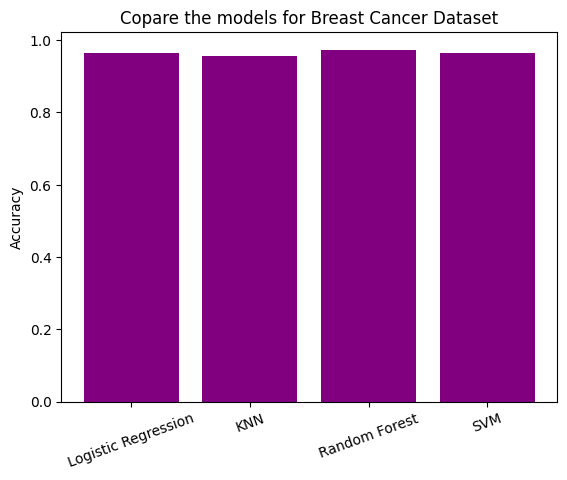


✅ The best model is: Random Forest with accuracy: 0.9736842105263158


In [31]:
import matplotlib.pyplot as plt

results = {
    "Logistic Regression": acc_log,
    "KNN": acc_knn,
    "Random Forest": acc_rf,
    "SVM": acc_svm
}

# show results
for model, acc in results.items():
    print(f"{model}: {acc:.4f}")

# barplot
plt.bar(results.keys(), results.values(), color="purple")
plt.ylabel("Accuracy")
plt.title("Copare the models for Breast Cancer Dataset")
plt.xticks(rotation=20)
plt.show()

best_model = max(results, key=results.get)
print("\n✅ The best model is:", best_model, "with accuracy:", results[best_model])
